In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [22]:
# tight_psf = np.genfromtxt('mattia/psf_tight_1801.dat',names=True)
# tight_d6 = np.genfromtxt('mattia/nz_tight_1801.dat',names=True)
tight_d6 = np.genfromtxt('mattia/zpt_1801_tight.dat',names=True)
# # tight_d4 = np.genfromtxt('hor1dir0501/tight_seq_d4.dat',names=True)
# zpt_d6 = np.genfromtxt('mattia/zpt_tight_1801.dat',
#                        names=True)

tight_psf = np.genfromtxt('mattia/psf_tight_0502.dat',names=True)
tight_1801 = np.genfromtxt('mattia/zpt_1801_tight.dat',names=True)
tight_2301 = np.genfromtxt('mattia/zpt_2301_tight.dat',names=True)

In [62]:
print(len(tight_d6))
print(len(tight_psf))
print(len(tight_1801))
print(len(tight_2301))

247
251
247
250


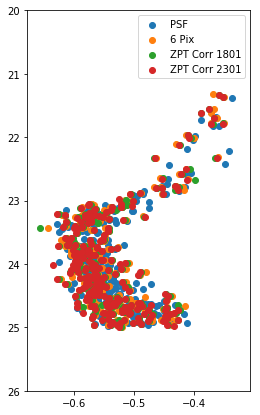

In [23]:
fig,ax = plt.subplots(figsize=(4,7))

ax.scatter(tight_psf['m606c']-tight_psf['m814c'],tight_psf['m606c'],label='PSF')
ax.scatter(tight_d6['mean_f606w']-tight_d6['mean_f814w'],tight_d6['mean_f606w'],label='6 Pix')
ax.scatter(tight_1801['zpt_mean_f606w']-tight_1801['zpt_mean_f814w'],
           tight_1801['zpt_mean_f606w'],label='ZPT Corr 1801')
ax.scatter(tight_2301['zpt_mean_f606w']-tight_2301['zpt_mean_f814w'],
           tight_2301['zpt_mean_f606w'],label='ZPT Corr 2301')


ax.legend()
ax.set_ylim(26,20)
plt.show()

In [24]:
col_psf = tight_psf['m606c'] - tight_psf['m814c']
# col_d4 = tight_d4['mean_f606w'] - tight_d4['mean_f814w']
col_d6 = tight_d6['mean_f606w'] - tight_d6['mean_f814w']
col_1801 = tight_1801['zpt_mean_f606w']-tight_1801['zpt_mean_f814w']
col_2301 = tight_2301['zpt_mean_f606w']-tight_2301['zpt_mean_f814w']

In [50]:
mbins = np.arange(22, 25, 0.5)

In [51]:
dig_psf = np.digitize(tight_psf['m606c'], mbins)
dig_1801 = np.digitize(tight_1801['zpt_mean_f606w'], mbins)
dig_2301 = np.digitize(tight_2301['zpt_mean_f606w'], mbins)
dig_d6 = np.digitize(tight_d6['mean_f606w'], mbins)

In [61]:
col_mean_p = np.zeros((len(mbins)-1))
col_mean_6 = np.zeros((len(mbins)-1))
col_mean_23 = np.zeros((len(mbins)-1))
col_mean_18 = np.zeros((len(mbins)-1))
for ii in range(1,len(mbins)):
    col_mean_p[ii-1] = np.median(col_psf[np.argwhere(dig_psf==ii)])
    print(len(col_psf[np.argwhere(dig_psf==ii)]))
    col_mean_6[ii-1] = np.median(col_d6[np.argwhere(dig_d6==ii)])
    print(len(col_psf[np.argwhere(dig_d6==ii)]))
    col_mean_23[ii-1] = np.median(col_2301[np.argwhere(dig_2301==ii)])
    print(len(col_psf[np.argwhere(dig_2301==ii)]))
    col_mean_18[ii-1] = np.median(col_1801[np.argwhere(dig_1801==ii)])
    print(len(col_psf[np.argwhere(dig_1801==ii)]))
    
    
#     [data3a[digitized3a == i].mean()              for i in range(1, len(bins))]

5
5
5
5
13
12
12
12
42
43
42
43
39
40
40
40
74
62
63
62


In [53]:
bin_means = [tight_psf['m606c'][dig_psf== i].mean() for i in range(1, len(mbins))]

In [54]:
# fig,ax = plt.subplots()

# ax.scatter(bin_means,col_mean_p,label='psf')
# ax.scatter(bin_means,col_mean_6,label='6 Pix')
# ax.scatter(bin_means,col_mean_4,label='4 Pix')

# ax.legend()
# ax.set_ylabel('Mean Color')
# ax.set_xlabel('Magnitude Bin')

# plt.show()

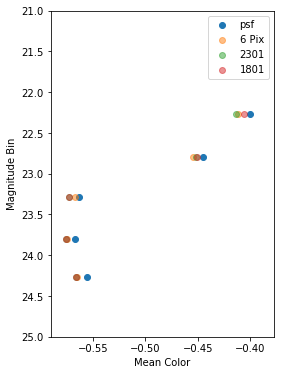

In [55]:
fig,ax = plt.subplots(figsize=(4,6))

ax.scatter(col_mean_p,bin_means,label='psf',alpha=1)
ax.scatter(col_mean_6,bin_means,label='6 Pix',alpha=0.5)
ax.scatter(col_mean_23,bin_means,label='2301',alpha=0.5)
ax.scatter(col_mean_18,bin_means,label='1801',alpha=0.5)

ax.legend()
ax.set_xlabel('Mean Color')
ax.set_ylabel('Magnitude Bin')
ax.set_ylim(25,21)

plt.show()

In [56]:
psf_d6 = col_mean_p - col_mean_6
psf_18 = col_mean_p - col_mean_18
psf_23 = col_mean_p - col_mean_23

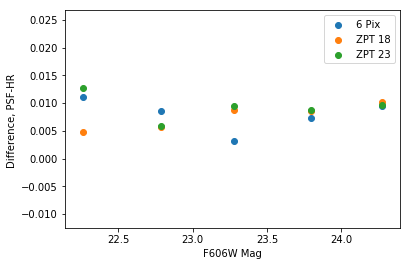

In [57]:
fig,ax = plt.subplots()

ax.scatter(bin_means,psf_d6,label='6 Pix')
ax.scatter(bin_means,psf_18,label='ZPT 18')
ax.scatter(bin_means,psf_23,label='ZPT 23')

ax.legend()
ax.set_ylabel('Difference, PSF-HR ')
ax.set_xlabel('F606W Mag')

plt.show()

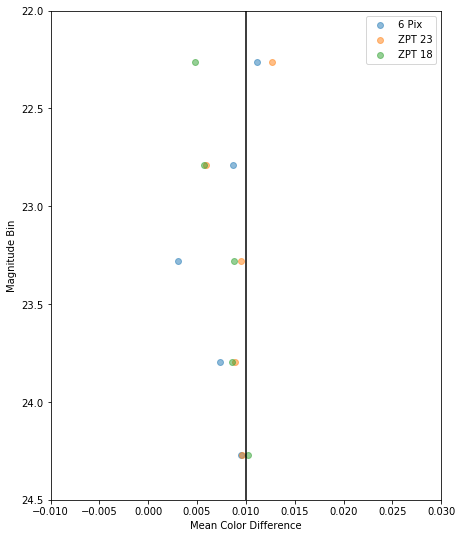

In [58]:
fig,ax = plt.subplots(figsize=(7,9))

ax.scatter(psf_d6,bin_means,label='6 Pix',alpha=0.5)
ax.scatter(psf_23,bin_means,label='ZPT 23',alpha=0.5)
ax.scatter(psf_18,bin_means,label='ZPT 18',alpha=0.5)

ax.legend()
ax.set_xlabel('Mean Color Difference')
ax.set_ylabel('Magnitude Bin')
ax.set_ylim(24.5,22)
ax.vlines(0.01,20,26)
ax.set_xlim(-0.01,0.03)

plt.show()

In [34]:
print('Mean:',np.nanmean(psf_d6))
print('Median:',np.nanmedian(psf_d6))

Mean: 0.00794999999999888
Median: 0.008659999999997225


In [35]:
print('Mean:',np.nanmean(psf_18))
print('Median:',np.nanmedian(psf_18))

Mean: 0.007614999999999839
Median: 0.0085550000000012


In [36]:
print('Mean:',np.nanmean(psf_23))
print('Median:',np.nanmedian(psf_23))

Mean: 0.009318999999999989
Median: 0.009520000000001971
